In [1]:
import numpy as np

In [2]:
# 01 - вертикаль
# 10 - горизонталь
P = [
    11, 10, 11,
    11, 10, 11,
     1,  0,  0
]
# E= [11, 10, 10, 11, 10, 0, 11, 10, 10]

C = [
    11, 10, 10,
     1,  0,  0,
    11, 10, 10
]
L = [
     1,  0,  0,
     1,  0,  0,
    11, 10,  10
]
# O = [
#      11, 11,  0,
#       1,  1,  0,
#      11, 11,  0
# ]

E = [11, 10, 10, 11, 10, 0, 11, 10, 10]
F = [11, 10, 10, 11, 10, 0, 1, 0, 0]
H = [1, 0, 1, 11, 10, 11, 1, 0, 1]


In [3]:
# перевод кодов признаков в десятичную систему
v1 = list(map(lambda x: int(str(x), 2), P))
v2 = list(map(lambda x: int(str(x), 2), C))
v3 = list(map(lambda x: int(str(x), 2), L))
print("вектора в десятичной системе:\n\n" + str(v1) + "\n" + str(v2) + "\n" + str(v3))

вектора в десятичной системе:

[3, 2, 3, 3, 2, 3, 1, 0, 0]
[3, 2, 2, 1, 0, 0, 3, 2, 2]
[1, 0, 0, 1, 0, 0, 3, 2, 2]


In [4]:
# централизация и нормализация

avg1 = sum(v1) / len(v1)
avg2 = sum(v2) / len(v2)
avg3 = sum(v3) / len(v3)
v1 =  list(map(lambda x: x - avg1, v1))
v2 =  list(map(lambda x: x - avg2, v2))
v3 =  list(map(lambda x: x - avg3, v3))

print("v1: ", v1)
print("v2: ", v2)
print("v3: ", v3)

ln1 = sum(list(map(lambda x: x*x, v1)))
v1 =  list(map(lambda x: x / (ln1 ** 0.5), v1))
ln2 = sum(list(map(lambda x: x*x, v2)))
v2 =  list(map(lambda x: x / (ln2 ** 0.5), v2))
ln3 = sum(list(map(lambda x: x*x, v3)))
v3 =  list(map(lambda x: x / (ln3 ** 0.5), v3))

v1:  [1.1111111111111112, 0.11111111111111116, 1.1111111111111112, 1.1111111111111112, 0.11111111111111116, 1.1111111111111112, -0.8888888888888888, -1.8888888888888888, -1.8888888888888888]
v2:  [1.3333333333333333, 0.33333333333333326, 0.33333333333333326, -0.6666666666666667, -1.6666666666666667, -1.6666666666666667, 1.3333333333333333, 0.33333333333333326, 0.33333333333333326]
v3:  [0.0, -1.0, -1.0, 0.0, -1.0, -1.0, 2.0, 1.0, 1.0]


In [5]:
# проверка
ln1 = sum(list(map(lambda x: x*x, v1)))
ln2 = sum(list(map(lambda x: x*x, v2)))
ln3 = sum(list(map(lambda x: x*x, v3)))

print(f"Длины векторов: {ln1}, {ln2}, {ln3}")
print(f"Сумма компонентов векторов: {sum(v1)}, {sum(v2)}, {sum(v3)}")
print("\nНормализованные вектора:\n\n" + str(v1) + "\n\n" + str(v2) + "\n\n" + str(v3))

Длины векторов: 1.0, 0.9999999999999998, 1.0
Сумма компонентов векторов: 0.0, -2.498001805406602e-16, 0.0

Нормализованные вектора:

[0.30949223029508643, 0.030949223029508657, 0.30949223029508643, 0.30949223029508643, 0.030949223029508657, 0.30949223029508643, -0.24759378423606915, -0.5261367915016469, -0.5261367915016469]

[0.42163702135578385, 0.10540925533894595, 0.10540925533894595, -0.21081851067789198, -0.5270462766947299, -0.5270462766947299, 0.42163702135578385, 0.10540925533894595, 0.10540925533894595]

[0.0, -0.31622776601683794, -0.31622776601683794, 0.0, -0.31622776601683794, -0.31622776601683794, 0.6324555320336759, 0.31622776601683794, 0.31622776601683794]


In [6]:
vp = np.matrix([v1, v2, v3])
# w = vp * vp.T
w = vp.T * vp
w.shape
# vp.shape

(9, 9)

In [7]:
vp[0]

matrix([[ 0.30949223,  0.03094922,  0.30949223,  0.30949223,  0.03094922,
          0.30949223, -0.24759378, -0.52613679, -0.52613679]])

In [8]:
vp.shape

(3, 9)

In [9]:
a = np.linalg.pinv(w)
# a = w.I
w*a

matrix([[ 0.38324555,  0.07624781,  0.20717331,  0.02658641, -0.28041134,
         -0.14948583,  0.11687986, -0.19011788, -0.19011788],
        [ 0.07624781,  0.36857286,  0.221846  , -0.28266867,  0.00965638,
         -0.13707048, -0.28041134,  0.01191372,  0.01191372],
        [ 0.20717331,  0.221846  ,  0.23764735, -0.07725107, -0.06257838,
         -0.04677703, -0.16980186, -0.15512917, -0.15512917],
        [ 0.02658641, -0.28266867, -0.07725107,  0.32906948,  0.0198144 ,
          0.225232  ,  0.1259092 , -0.18334587, -0.18334587],
        [-0.28041134,  0.00965638, -0.06257838,  0.0198144 ,  0.30988212,
          0.23764735, -0.27138199,  0.01868573,  0.01868573],
        [-0.14948583, -0.13707048, -0.04677703,  0.225232  ,  0.23764735,
          0.32794081, -0.16077251, -0.14835716, -0.14835716],
        [ 0.11687986, -0.28041134, -0.16980186,  0.1259092 , -0.27138199,
         -0.16077251,  0.47805367,  0.08076248,  0.08076248],
        [-0.19011788,  0.01191372, -0.15512917, 

In [10]:
a*w

matrix([[ 0.38324555,  0.07624781,  0.20717331,  0.02658641, -0.28041134,
         -0.14948583,  0.11687986, -0.19011788, -0.19011788],
        [ 0.07624781,  0.36857286,  0.221846  , -0.28266867,  0.00965638,
         -0.13707048, -0.28041134,  0.01191372,  0.01191372],
        [ 0.20717331,  0.221846  ,  0.23764735, -0.07725107, -0.06257838,
         -0.04677703, -0.16980186, -0.15512917, -0.15512917],
        [ 0.02658641, -0.28266867, -0.07725107,  0.32906948,  0.0198144 ,
          0.225232  ,  0.1259092 , -0.18334587, -0.18334587],
        [-0.28041134,  0.00965638, -0.06257838,  0.0198144 ,  0.30988212,
          0.23764735, -0.27138199,  0.01868573,  0.01868573],
        [-0.14948583, -0.13707048, -0.04677703,  0.225232  ,  0.23764735,
          0.32794081, -0.16077251, -0.14835716, -0.14835716],
        [ 0.11687986, -0.28041134, -0.16980186,  0.1259092 , -0.27138199,
         -0.16077251,  0.47805367,  0.08076248,  0.08076248],
        [-0.19011788,  0.01191372, -0.15512917, 

In [11]:
a

matrix([[ 0.53900006,  0.07976545,  0.28416903,  0.07117262, -0.38806199,
         -0.1836584 ,  0.17202749, -0.28720713, -0.28720713],
        [ 0.07976545,  1.6561514 ,  0.78665652, -1.48904085,  0.0873451 ,
         -0.78214977, -1.16383325,  0.4125527 ,  0.4125527 ],
        [ 0.28416903,  0.78665652,  0.50366654, -0.61373448, -0.11124699,
         -0.39423697, -0.48674954,  0.01573794,  0.01573794],
        [ 0.07117262, -1.48904085, -0.61373448,  1.42325764, -0.13695583,
          0.73835054,  1.0424591 , -0.51775437, -0.51775437],
        [-0.38806199,  0.0873451 , -0.11124699, -0.13695583,  0.33845126,
          0.13985917, -0.29340164,  0.18200546,  0.18200546],
        [-0.1836584 , -0.78214977, -0.39423697,  0.73835054,  0.13985917,
          0.52777197,  0.38368207, -0.2148093 , -0.2148093 ],
        [ 0.17202749, -1.16383325, -0.48674954,  1.0424591 , -0.29340164,
          0.38368207,  1.00584575, -0.33001499, -0.33001499],
        [-0.28720713,  0.4125527 ,  0.01573794, 

In [12]:
# w.I*w

In [13]:
np.matrix([v1]).T

matrix([[ 0.30949223],
        [ 0.03094922],
        [ 0.30949223],
        [ 0.30949223],
        [ 0.03094922],
        [ 0.30949223],
        [-0.24759378],
        [-0.52613679],
        [-0.52613679]])

In [14]:
print(w.shape)
print(np.matrix([v1]).T.shape)

(9, 9)
(9, 1)


In [15]:
v11 = a*np.matrix([v1]).T
v22 = a*np.matrix([v2]).T
v33 = a*np.matrix([v3]).T


# v11 = np.linalg.solve(w, np.matrix([v1]).T)
# v22 = np.linalg.solve(w, np.matrix([v2]).T)
# v33 = np.linalg.solve(w, np.matrix([v3]).T)

print(np.allclose(np.dot(w, np.matrix([v1]).T), v11))

v11 = list(map(lambda x: float(x), v11))
v22 = list(map(lambda x: float(x), v22))
v33 = list(map(lambda x: float(x), v33))

ln1 = sum(list(map(lambda x: x*x, v11)))
ln2 = sum(list(map(lambda x: x*x, v22)))
ln3 = sum(list(map(lambda x: x*x, v33)))

print(f"Длины векторов: {ln1}, {ln2}, {ln3}")
print(f"Произведения векторов: { np.array(v11) @ np.array(v22)}, { np.array(v11)@ np.array(v33)}, { np.array(v22)@ np.array(v33)}")

False
Длины векторов: 2.0948081264108342, 1.6478555304740394, 2.9909706546275387
Произведения векторов: -0.42285158019230307, 1.7298473735139688, -1.286681715575619


C:\Users\sergey.astakhov\AppData\Local\Temp\ipykernel_6416\400437016.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v11 = list(map(lambda x: float(x), v11))
C:\Users\sergey.astakhov\AppData\Local\Temp\ipykernel_6416\400437016.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v22 = list(map(lambda x: float(x), v22))
C:\Users\sergey.astakhov\AppData\Local\Temp\ipykernel_6416\400437016.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v33 = list(map(lambda

In [16]:
v11

[0.4700369583352917,
 -0.5267655567550685,
 0.0567285984197761,
 0.7374717794570949,
 -0.2593307356332636,
 0.3241634195415805,
 0.3971001889384358,
 -0.5997023261519239,
 -0.5997023261519231]

In [17]:
print("Сопряженные вектора")
print(v11)
print(v22)
print(v33)

Сопряженные вектора
[0.4700369583352917, -0.5267655567550685, 0.0567285984197761, 0.7374717794570949, -0.2593307356332636, 0.3241634195415805, 0.3971001889384358, -0.5997023261519239, -0.5997023261519231]
[0.5639276188562116, 0.5674967810008715, 0.4497144302271059, -0.47826772738438167, -0.4746985652397232, -0.5924809160134885, -0.014276648578637698, -0.010707486433978609, -0.01070748643397911]
[-0.007138324289318284, -1.0279186976619563, -0.5460818081329146, 0.8066306446930624, -0.2141497286795736, 0.2676871608494679, 0.920843833322169, -0.09993654005046874, -0.09993654005046743]


In [18]:
np.matrix(v11).T * np.matrix(v1)

matrix([[ 0.14547279,  0.01454728,  0.14547279,  0.14547279,  0.01454728,
          0.14547279, -0.11637823, -0.24730374, -0.24730374],
        [-0.16302985, -0.01630298, -0.16302985, -0.16302985, -0.01630298,
         -0.16302985,  0.13042388,  0.27715074,  0.27715074],
        [ 0.01755706,  0.00175571,  0.01755706,  0.01755706,  0.00175571,
          0.01755706, -0.01404565, -0.029847  , -0.029847  ],
        [ 0.22824179,  0.02282418,  0.22824179,  0.22824179,  0.02282418,
          0.22824179, -0.18259343, -0.38801104, -0.38801104],
        [-0.08026085, -0.00802608, -0.08026085, -0.08026085, -0.00802608,
         -0.08026085,  0.06420868,  0.13644344,  0.13644344],
        [ 0.10032606,  0.01003261,  0.10032606,  0.10032606,  0.01003261,
          0.10032606, -0.08026085, -0.1705543 , -0.1705543 ],
        [ 0.12289942,  0.01228994,  0.12289942,  0.12289942,  0.01228994,
          0.12289942, -0.09831954, -0.20892902, -0.20892902],
        [-0.18560321, -0.01856032, -0.18560321, 

In [19]:
v11

[0.4700369583352917,
 -0.5267655567550685,
 0.0567285984197761,
 0.7374717794570949,
 -0.2593307356332636,
 0.3241634195415805,
 0.3971001889384358,
 -0.5997023261519239,
 -0.5997023261519231]

In [20]:
# 01 - вертикаль
# 10 - горизонталь

# изменный символ "L"

# Q = [
#     11, 11,  0,
#     11, 11,  0,
#      1,  0,  0
# ]
# Q = [
#     11, 10,  0,
#      1,  0,  0,
#     11, 10,  0
# ]
Q = [
     1,  0,  0,
     1,  0,  0,
    11, 10,  0
]
# q = [11, 10, 11, 11, 10, 10, 11, 10, 11]

# Q = [11, 10, 11, 11, 10, 10, 11, 10, 11]


vq = list(map(lambda x: int(str(x), 2), Q))
print("вектор в десятичной системе:\n\n" + str(vq))

avgq = sum(vq) / len(vq)
vq =  list(map(lambda x: x - avgq, vq))

lnq = sum(list(map(lambda x: x*x, vq)))
vq =  list(map(lambda x: x / (lnq ** 0.5), vq))

lnq = sum(list(map(lambda x: x*x, vq)))

print(f"Длина вектора: {lnq}")
print(f"Сумма компонентов вектора: {sum(vq)}")
print("Центрированный и нормализованный вектор:\n\n" + str(vq))

вектор в десятичной системе:

[1, 0, 0, 1, 0, 0, 3, 2, 0]
Длина вектора: 0.9999999999999997
Сумма компонентов вектора: 1.1102230246251565e-16
Центрированный и нормализованный вектор:

[0.07188851546895893, -0.25160980414135625, -0.25160980414135625, 0.07188851546895893, -0.25160980414135625, -0.25160980414135625, 0.7188851546895894, 0.3953868350792742, -0.25160980414135625]


In [21]:
zeta1 = np.array(v11) @ np.array(vq)
zeta2 = np.array(v22) @ np.array(vq)
zeta3 = np.array(v33) @ np.array(vq)
print(zeta1, zeta2, zeta3)

0.3880053895530886 0.0069277077372853725 1.0876501147537


In [22]:
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 

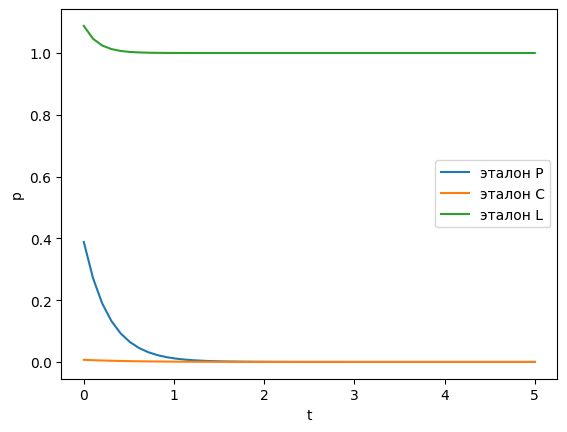

In [23]:
p_arr = [zeta1, zeta2, zeta3]
labels = ["P", "C", "L"]

# описание ДУ
def returns_dpdt1(p, t): 
    lamb = 1
    B = -2
    C = 3
    p_ex = list(set(p_arr) - set([p_arr[ii]]))
    # print(p_ex)
    dpdt = lamb * p - B * p * sum(list(map(lambda x: x*2, p_ex))) - C * p * sum(list(map(lambda x: x*2, p_arr)))
    return dpdt  
    
# точки на оси времени
t = np.linspace(0,5)

for ii in range(3):
    # начальное условие 
    p0 = p_arr[ii]
    
    # решение ДУ 
    if ii < 2:
        p = odeint(returns_dpdt1, p0, t) 
        plt.plot(t,p, label="эталон " + labels[ii]) 
    else:
        p = odeint(returns_dpdt1, p0-1, t)
        plt.plot(t,p+1, label="эталон " + labels[ii]) 
    
# вывод графика
plt.legend()
plt.xlabel("t") 
plt.ylabel("p") 
plt.show()


In [24]:
# p

In [26]:
print(p[3])

[0.0126791]


In [27]:
g = np.matrix([[1,2],[3,4]])

In [28]:
g*g.I

matrix([[1.0000000e+00, 0.0000000e+00],
        [8.8817842e-16, 1.0000000e+00]])

In [29]:
g.I * g

matrix([[1.00000000e+00, 0.00000000e+00],
        [1.11022302e-16, 1.00000000e+00]])

In [30]:
from scipy.optimize import fsolve


In [97]:
def nonlinearEquation(p_arr):
    F=np.zeros(3)
    lamb = 1
    B = -2
    C = 3
    ii = 0
    p_ex = list(set(p_arr) - set([p_arr[ii]]))
    p = p_arr[ii]
    F[0]=lamb * p - B * p * sum(list(map(lambda x: x*2, p_ex))) - C * p * sum(list(map(lambda x: x*2, p_arr)))
    ii = 1
    p_ex = list(set(p_arr) - set([p_arr[ii]]))
    p = p_arr[ii]
    F[1]=lamb * p - B * p * sum(list(map(lambda x: x*2, p_ex))) - C * p * sum(list(map(lambda x: x*2, p_arr)))
    ii = 2
    p_ex = list(set(p_arr) - set([p_arr[ii]]))
    p = p_arr[ii]
    F[2]=lamb * p - B * p * sum(list(map(lambda x: x*2, p_ex))) - C * p * sum(list(map(lambda x: x*2, p_arr)))
    return F

In [98]:
# generate an initial guess
initialGuess=np.array(p_arr)   
 
# solve the problem    
solutionInfo=fsolve(nonlinearEquation,initialGuess,full_output=1)

In [99]:
solutionInfo[0]

array([1.25000000e-01, 8.25357787e-12, 1.25000000e-01])

In [100]:
# plt.plot((p_arr[0]), (F[0]), linestyle='dashed', color='dodgerblue', label='z*=q_1000')

In [101]:
solutionInfo

(array([1.25000000e-01, 8.25357787e-12, 1.25000000e-01]),
 {'nfev': 24,
  'fjac': array([[-0.90713001, -0.09182804, -0.41071006],
         [-0.07326771, -0.92654289,  0.36898525],
         [ 0.41442368, -0.36480938, -0.83376683]]),
  'r': array([ 0.69850474,  0.22682568,  0.33959724, -0.49747769, -0.24257065,
          0.71576995]),
  'qtf': array([ 7.21293962e-10,  8.42643666e-10, -1.73218059e-10]),
  'fvec': array([ 4.21146451e-12,  4.12678894e-12, -8.55288063e-13])},
 1,
 'The solution converged.')